# Analyse des ventes d'un supermarché

Ce notebook présente une analyse des données de ventes d'un supermarché pour en extraire des insights commerciaux.

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Chargement des variables d'environnement
load_dotenv()

# Connexion à la base de données
try:
    connection = mysql.connector.connect(
        host=os.getenv('DB_HOST'),
        port=os.getenv('DB_PORT'),
        user=os.getenv('DB_USER'),
        password=os.getenv('DB_PASSWORD'),
        database=os.getenv('DB_NAME')
    )
    
    if connection.is_connected():
        cursor = connection.cursor()
        print("Connexion à la base de données établie avec succès")
except Error as e:
    print(f"Erreur lors de la connexion à MySQL: {e}")

Connexion à la base de données établie avec succès


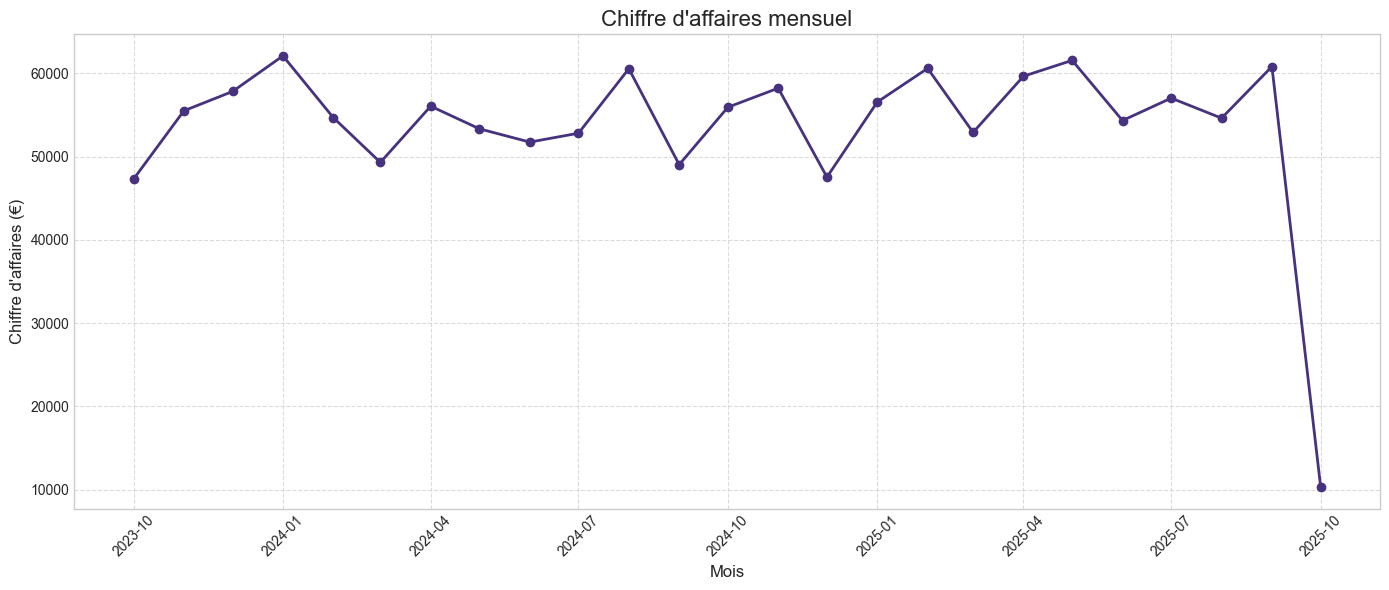

        Month   Revenue
0  2023-10-01  47299.07
1  2023-11-01  55506.71
2  2023-12-01  57831.34
3  2024-01-01  62103.66
4  2024-02-01  54695.43
5  2024-03-01  49312.41
6  2024-04-01  56062.64
7  2024-05-01  53343.93
8  2024-06-01  51750.00
9  2024-07-01  52817.30
10 2024-08-01  60562.74
11 2024-09-01  49043.29
12 2024-10-01  55937.86
13 2024-11-01  58225.24
14 2024-12-01  47546.98
15 2025-01-01  56562.37
16 2025-02-01  60604.39
17 2025-03-01  52915.32
18 2025-04-01  59660.60
19 2025-05-01  61564.33
20 2025-06-01  54339.45
21 2025-07-01  57031.41
22 2025-08-01  54623.94
23 2025-09-01  60822.54
24 2025-10-01  10327.03


In [2]:
# Chiffre d'affaires par mois
query_monthly_revenue = """
SELECT 
    DATE_FORMAT(OrderDate, '%Y-%m') AS Month,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Month
ORDER BY Month
"""

df_monthly_revenue = pd.read_sql(query_monthly_revenue, connection)

# Conversion de la colonne Month en datetime pour un meilleur affichage
df_monthly_revenue['Month'] = pd.to_datetime(df_monthly_revenue['Month'])

# Création du graphique
plt.figure(figsize=(14, 6))
plt.plot(df_monthly_revenue['Month'], df_monthly_revenue['Revenue'], marker='o', linewidth=2)
plt.title('Chiffre d\'affaires mensuel', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Affichage du tableau
print(df_monthly_revenue)

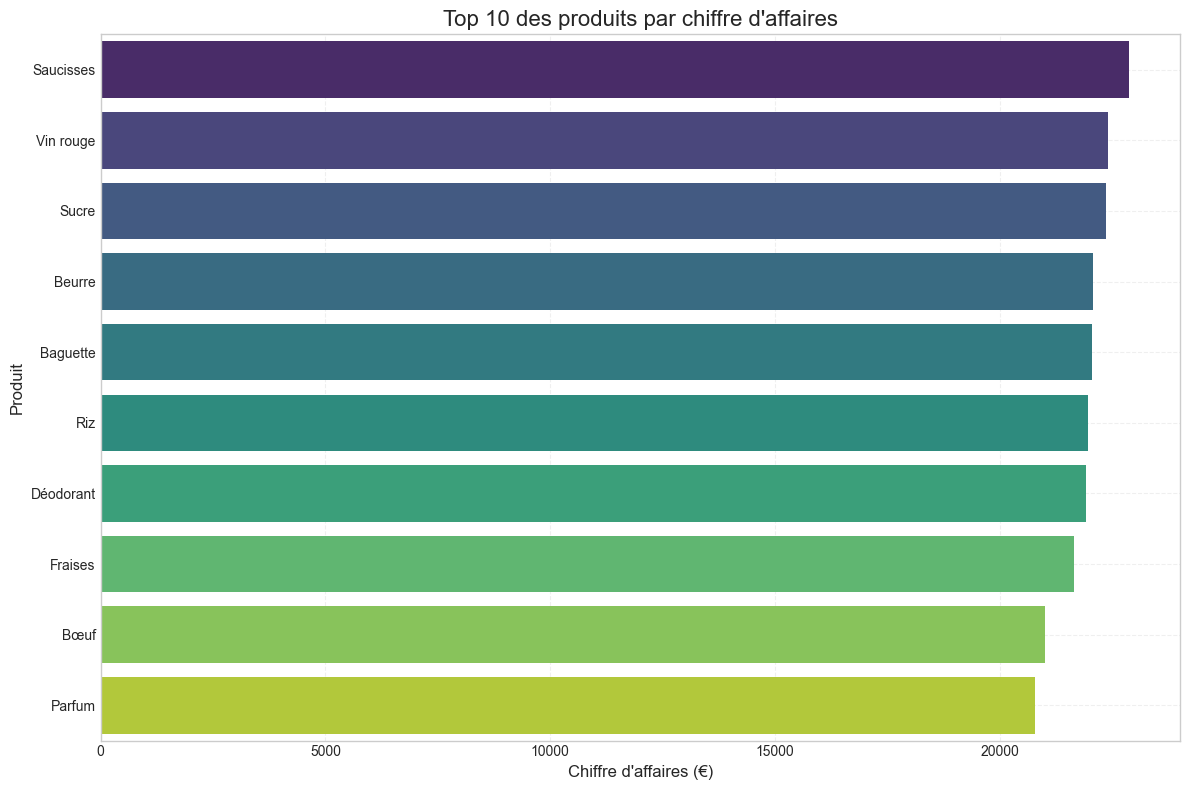

     Product   Revenue
0  Saucisses  22863.70
1  Vin rouge  22399.09
2      Sucre  22361.49
3     Beurre  22070.20
4   Baguette  22050.90
5        Riz  21963.16
6  Déodorant  21912.14
7    Fraises  21652.79
8       Bœuf  21014.38
9     Parfum  20779.82


In [3]:
# Top 10 des produits par chiffre d'affaires
query_top_products = """
SELECT 
    Product,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Product
ORDER BY Revenue DESC
LIMIT 10
"""

df_top_products = pd.read_sql(query_top_products, connection)

# Création du graphique en barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Product', data=df_top_products, palette='viridis')
plt.title('Top 10 des produits par chiffre d\'affaires', fontsize=16)
plt.xlabel('Chiffre d\'affaires (€)', fontsize=12)
plt.ylabel('Produit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Affichage du tableau
print(df_top_products)

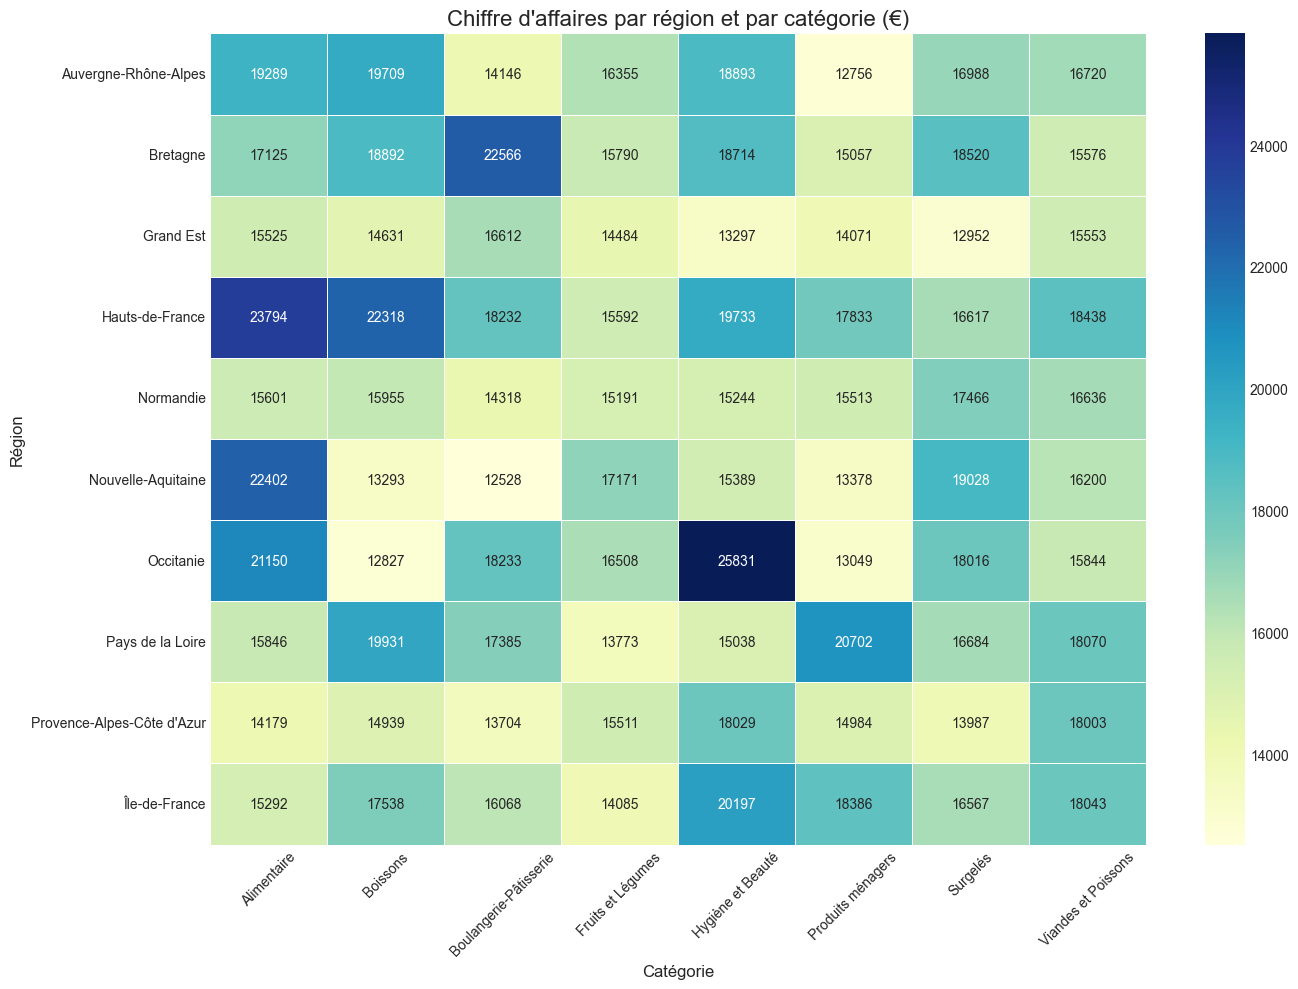

Category                    Alimentaire  Boissons  Boulangerie-Pâtisserie  \
Region                                                                      
Auvergne-Rhône-Alpes           19289.40  19709.29                14145.64   
Bretagne                       17124.83  18891.56                22566.15   
Grand Est                      15524.63  14630.98                16612.29   
Hauts-de-France                23794.14  22317.50                18232.12   
Normandie                      15600.96  15954.59                14318.49   
Nouvelle-Aquitaine             22401.67  13293.16                12527.60   
Occitanie                      21149.84  12827.33                18232.97   
Pays de la Loire               15846.17  19931.34                17384.75   
Provence-Alpes-Côte d'Azur     14179.39  14939.14                13704.27   
Île-de-France                  15292.10  17538.33                16067.63   

Category                    Fruits et Légumes  Hygiène et Beauté  \
Region 

In [4]:
# Chiffre d'affaires par région et par catégorie
query_region_category = """
SELECT 
    Region,
    Category,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Region, Category
ORDER BY Region, Category
"""

df_region_category = pd.read_sql(query_region_category, connection)

# Création d'un tableau croisé pour la heatmap
pivot_table = df_region_category.pivot_table(
    index='Region', 
    columns='Category', 
    values='Revenue', 
    aggfunc='sum'
)

# Création de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Chiffre d\'affaires par région et par catégorie (€)', fontsize=16)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage du tableau
print(pivot_table)

In [5]:
# Analyse des tendances et insights clés

# Mois le plus performant
best_month = df_monthly_revenue.loc[df_monthly_revenue['Revenue'].idxmax(), 'Month'].strftime('%B %Y')
best_month_revenue = df_monthly_revenue['Revenue'].max()

# Produit le plus rentable
best_product = df_top_products.iloc[0]['Product']
best_product_revenue = df_top_products.iloc[0]['Revenue']

# Région avec le plus grand chiffre d'affaires
query_region_revenue = """
SELECT 
    Region,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Region
ORDER BY Revenue DESC
LIMIT 1
"""

df_region_revenue = pd.read_sql(query_region_revenue, connection)
best_region = df_region_revenue.iloc[0]['Region']
best_region_revenue = df_region_revenue.iloc[0]['Revenue']

# Catégorie la plus vendue
query_category_revenue = """
SELECT 
    Category,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Category
ORDER BY Revenue DESC
LIMIT 1
"""

df_category_revenue = pd.read_sql(query_category_revenue, connection)
best_category = df_category_revenue.iloc[0]['Category']
best_category_revenue = df_category_revenue.iloc[0]['Revenue']

# Affichage des insights
print("=== INSIGHTS COMMERCIAUX CLÉS ===")
print(f"\n📅 Mois le plus performant: {best_month} avec un chiffre d'affaires de {best_month_revenue:.2f} €")
print(f"\n🏆 Produit le plus rentable: {best_product} avec un chiffre d'affaires de {best_product_revenue:.2f} €")
print(f"\n🗺️ Région avec le plus grand chiffre d'affaires: {best_region} avec {best_region_revenue:.2f} €")
print(f"\n📦 Catégorie la plus vendue: {best_category} avec un chiffre d'affaires de {best_category_revenue:.2f} €")

# Analyse de la corrélation entre quantité et prix unitaire
query_quantity_price = """
SELECT 
    AVG(UnitPrice) AS AvgPrice,
    SUM(Quantity) AS TotalQuantity
FROM sales
GROUP BY Product
"""

df_quantity_price = pd.read_sql(query_quantity_price, connection)
correlation = df_quantity_price['AvgPrice'].corr(df_quantity_price['TotalQuantity'])

print(f"\n📊 Corrélation entre prix moyen et quantité vendue: {correlation:.2f}")
if correlation < -0.3:
    print("   → Il existe une corrélation négative modérée: les produits moins chers se vendent en plus grande quantité.")
elif correlation > 0.3:
    print("   → Il existe une corrélation positive modérée: les produits plus chers se vendent également en plus grande quantité.")
else:
    print("   → Il n'y a pas de corrélation claire entre le prix et la quantité vendue.")

# Tendance saisonnière
query_seasonal = """
SELECT 
    CASE 
        WHEN MONTH(OrderDate) IN (12, 1, 2) THEN 'Hiver'
        WHEN MONTH(OrderDate) IN (3, 4, 5) THEN 'Printemps'
        WHEN MONTH(OrderDate) IN (6, 7, 8) THEN 'Été'
        WHEN MONTH(OrderDate) IN (9, 10, 11) THEN 'Automne'
    END AS Season,
    SUM(Quantity * UnitPrice) AS Revenue
FROM sales
GROUP BY Season
ORDER BY Revenue DESC
"""

df_seasonal = pd.read_sql(query_seasonal, connection)
best_season = df_seasonal.iloc[0]['Season']
best_season_revenue = df_seasonal.iloc[0]['Revenue']

print(f"\n🌤️ Saison la plus performante: {best_season} avec un chiffre d'affaires de {best_season_revenue:.2f} €")

# Recommandations
print("\n=== RECOMMANDATIONS STRATÉGIQUES ===")
print(f"\n1. Concentrez les efforts marketing sur la région {best_region} qui génère le plus de revenus.")
print(f"2. Assurez-vous un stock optimal pour le produit {best_product}, le plus rentable.")
print(f"3. Analysez les facteurs de succès du mois de {best_month} pour les reproduire.")
print(f"4. La catégorie {best_category} étant la plus vendue, envisagez d'élargir cette offre.")
print(f"5. Préparez des promotions spéciales pour la saison {best_season} pour maximiser les revenus.")

=== INSIGHTS COMMERCIAUX CLÉS ===

📅 Mois le plus performant: January 2024 avec un chiffre d'affaires de 62103.66 €

🏆 Produit le plus rentable: Saucisses avec un chiffre d'affaires de 22863.70 €

🗺️ Région avec le plus grand chiffre d'affaires: Hauts-de-France avec 152557.61 €

📦 Catégorie la plus vendue: Hygiène et Beauté avec un chiffre d'affaires de 180364.95 €

📊 Corrélation entre prix moyen et quantité vendue: -0.06
   → Il n'y a pas de corrélation claire entre le prix et la quantité vendue.

🌤️ Saison la plus performante: Hiver avec un chiffre d'affaires de 339344.17 €

=== RECOMMANDATIONS STRATÉGIQUES ===

1. Concentrez les efforts marketing sur la région Hauts-de-France qui génère le plus de revenus.
2. Assurez-vous un stock optimal pour le produit Saucisses, le plus rentable.
3. Analysez les facteurs de succès du mois de January 2024 pour les reproduire.
4. La catégorie Hygiène et Beauté étant la plus vendue, envisagez d'élargir cette offre.
5. Préparez des promotions spécial

In [6]:
# Fermeture de la connexion à la base de données
if 'connection' in locals() and connection.is_connected():
    cursor.close()
    connection.close()
    print("Connexion à la base de données fermée")

Connexion à la base de données fermée
